In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path
import functools

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-05-10 09:41:43.660942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 09:41:43.731000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 09:41:43.733229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 09:41:45.299474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc, plotting

In [6]:
from daaf import estimator_metrics

In [7]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1715263005/1715264399/metrics/*.parquet")

In [8]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/8 [00:00<?, ?it/s]

2024-05-10 09:41:50,703	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

Read progress 0:   0%|          | 0/50 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [9]:
df_metrics.head()

,episode,exp_id,meta,state_values,over_states_then_runs,over_runs_then_states,policy_metrics,method
0,210,1715263005-21b6c410-ABCSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","{'data': [-41.609358307470586, -37.00250686714...","{'mae': [3.6644516926540907, 2.351490232435727...","{'mae': [4.4294263545227945, 3.438744492927786...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",PP/LEAST
1,210,1715263005-2269c7b3-IceWorld,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-21.019047619047637, -20.59375, -19....","{'mae': [10.468658191546094, 9.132634140204011...","{'mae': [16.80332580376269, 15.66794538578296,...","{'pi_equi': [0.6875, 0.5625, 0.6875, 0.5, 0.68...",PP/IMR
2,210,1715263005-208748ef-RedGreenSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","{'data': [-22.28312328281366, -20.166418959093...","{'mae': [0.77100046456405, 1.4820405605185907,...","{'mae': [0.9849470982792375, 0.912362697127023...","{'pi_equi': [1.0, 0.8888888888888888, 1.0, 1.0...",PP/IMR
3,210,1715263005-2368b584-ABCSeq,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-48.242857142857154, -41.52554744525...","{'mae': [1.458278610499502, 1.0107928221020148...","{'mae': [2.0285713621980745, 2.113673134313573...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT
4,210,1715263005-20552ca0-IceWorld,"{'algorithm': 'one-step-td', 'algorithm_args':...","{'data': [-3.444038492170421, -2.2090094957192...","{'mae': [19.44051234362073, 18.779293130803538...","{'mae': [30.230695941514107, 30.42420960482479...","{'pi_equi': [0.5, 0.625, 0.625, 0.625, 0.6875]}",PP/IMR


In [10]:
df_metrics.iloc[0]

episode                                                                210
exp_id                                          1715263005-21b6c410-ABCSeq
meta                     {'algorithm': 'one-step-td', 'algorithm_args':...
state_values             {'data': [-41.609358307470586, -37.00250686714...
over_states_then_runs    {'mae': [3.6644516926540907, 2.351490232435727...
over_runs_then_states    {'mae': [4.4294263545227945, 3.438744492927786...
policy_metrics                      {'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}
method                                                            PP/LEAST
Name: 0, dtype: object

In [11]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'one-step-td',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-48.99999993, -41.99999999, -35.        , -28.        ,
        -21.        , -14.        ,  -7.        ,   0.        ]),
 'env': {'args': '{"length": 7, "distance_penalty": false}',
  'level': 'n=7',
  'name': 'ABCSeq',
  '_level': '7'},
 'epsilon': 0.0,
 'exp_id': '1715263005-21b6c410-ABCSeq',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 4,
 'run_id': 4,
 'traj_mapping_method': 'LEAST'}

In [12]:
envs = dataproc.get_distinct_envs(df_metrics)

In [13]:
envs

{('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}'}

In [14]:
sorted(envs)

[('ABCSeq', 'n=10'),
 ('ABCSeq', 'n=7'),
 ('FrozenLake-v1', '4x4'),
 ('GridWorld', '4x12'),
 ('IceWorld', '4x4'),
 ('IceWorld', '8x8'),
 ('RedGreenSeq', 'n=9'),
 ('TowerOfHanoi', 'disks=4')]

In [15]:
df_eval_result = dataproc.create_eval_result_data(df_metrics)

In [16]:
df_eval_result["one-step"]

,episode,exp_id,state_values,over_states_then_runs,over_runs_then_states,policy_metrics,method,algorithm,algorithm_args,reward_period,discount_factor,drop_truncated_feedback_episodes,level,name
9,210,1715263005-3572da47-IceWorld,"{'data': [-37.542857142857144, -34.80519480519...","{'mae': [1.7068935563036947, 1.870842415675237...","{'mae': [0.3480937321811098, 0.621529757137899...","{'pi_equi': [0.875, 0.8125, 0.875, 0.875, 0.93...",OP/OT,first-visit-mc,{},2,1.00,False,4x4,IceWorld
16,210,1715263005-2fd11454-IceWorld,"{'data': [-157.5238095238096, -155.29661016949...","{'mae': [28.008063581874012, 21.46164475450442...","{'mae': [1.358621179663544, 2.3612964336500113...","{'pi_equi': [0.609375, 0.65625, 0.75, 0.640625...",OP/OT,first-visit-mc,{},2,1.00,False,8x8,IceWorld
24,210,1715263005-7a6dc6ab-ABCSeq,"{'data': [-43.28150973467099, -37.545222135674...","{'mae': [1.8851276536600627, 2.007692738311484...","{'mae': [5.205016366314962, 3.842254745151729,...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT,first-visit-mc,{},2,0.99,False,n=7,ABCSeq
57,210,1715263005-631e781d-ABCSeq,"{'data': [-77.6994919965922, -71.5224989928174...","{'mae': [6.417654514757337, 5.493878912944344,...","{'mae': [15.529773900523935, 13.20288294001963...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT,first-visit-mc,{},2,0.99,False,n=10,ABCSeq
244,210,1715263005-0e03f05d-IceWorld,"{'data': [-136.73952543050856, -136.2396919335...","{'mae': [21.921070293245332, 19.34047746727526...","{'mae': [17.11032154491018, 16.526974051294687...","{'pi_equi': [0.359375, 0.296875, 0.25, 0.26562...",OP/OT,first-visit-mc,{},2,0.99,False,8x8,IceWorld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35017,490,1715263005-b8c0aced-IceWorld,"{'data': [-31.07807244744983, -29.827280577727...","{'mae': [88.17586982123638, 87.61834797915793,...","{'mae': [89.46104245830664, 90.39601283801807,...","{'pi_equi': [0.390625, 0.375, 0.40625, 0.40625...",PP/LEAST,one-step-td,{},8,0.99,False,8x8,IceWorld
35119,490,1715263005-d57ef427-GridWorld,"{'data': [-909.7139949455826, -906.91342436475...","{'mae': [29.533313894220257, 52.03060432403114...","{'mae': [31.95303811576357, 33.893878871400304...","{'pi_equi': [0.8157894736842105, 0.89473684210...",PP/LEAST,one-step-td,{},8,0.99,False,4x12,GridWorld
35125,490,1715263005-deac8d36-TowerOfHanoi,"{'data': [-98.62113419951496, -93.053928078489...","{'mae': [0.656088544373426, 0.6610054390510612...","{'mae': [0.15167385958368698, 0.55405755110115...","{'pi_equi': [0.9753086419753086, 1.0, 0.962962...",PP/LEAST,one-step-td,{},8,0.99,False,disks=4,TowerOfHanoi
35153,490,1715263005-e1fd4b84-ABCSeq,"{'data': [-35.06838713976134, -32.134101359548...","{'mae': [1.0737037325898604, 1.21520268180775,...","{'mae': [3.0787086505224877, 2.418193973117017...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",PP/LEAST,one-step-td,{},8,0.99,False,n=7,ABCSeq


In [17]:
plot_eval_result = functools.partial(
    plotting.plot_eval_result,
    metric_family = "over_runs_then_states",
    metric_col = "rmse",
    max_episode = np.inf,
    max_reward_period = 8,
    output_dir = "figures/evalerror_rmse"
)

## ABC, n=10, $\gamma=1.0$

first-visit-mc


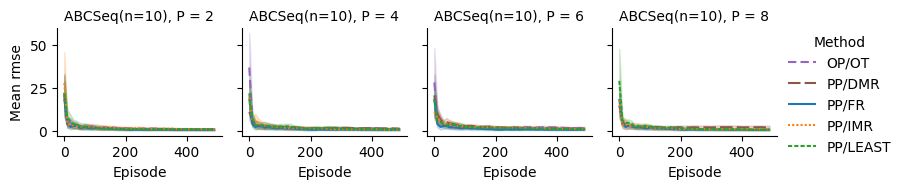

one-step-td


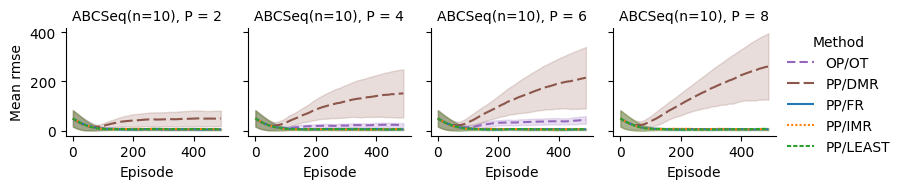

In [18]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


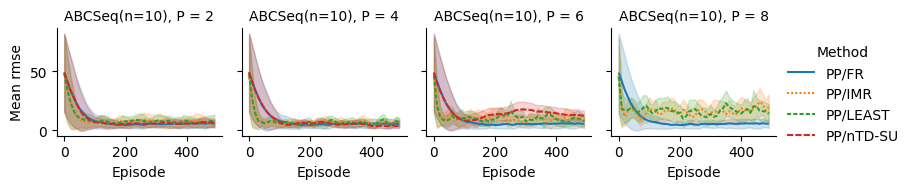

In [19]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=10, $\gamma=0.99$

first-visit-mc


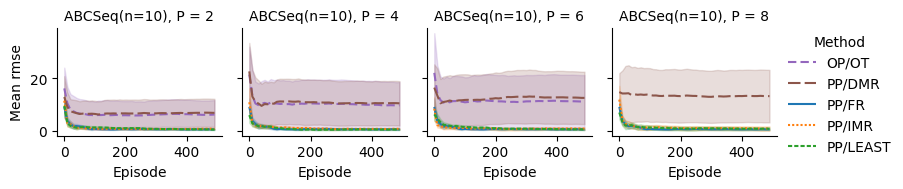

one-step-td


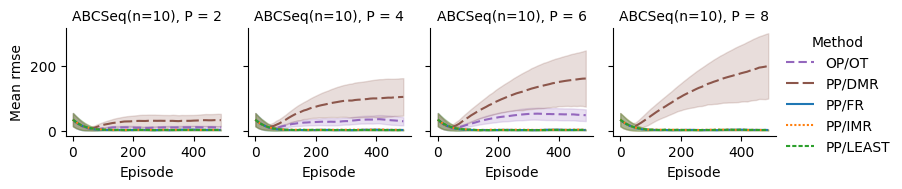

In [20]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


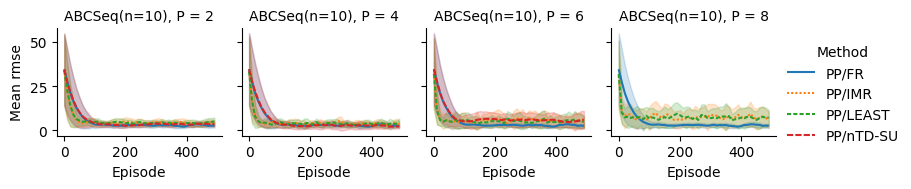

In [21]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=1.0$

first-visit-mc


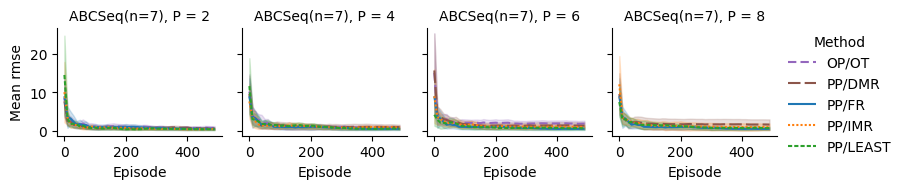

one-step-td


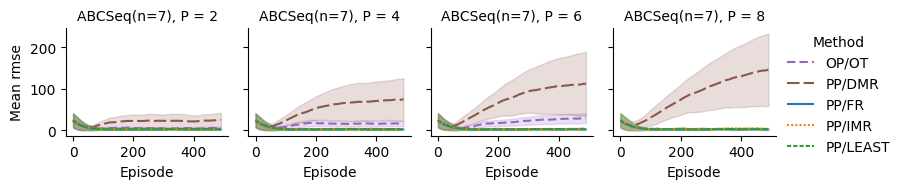

In [22]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


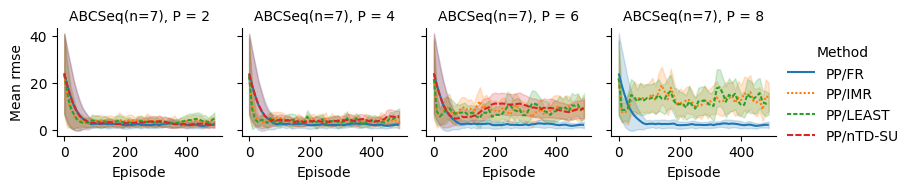

In [23]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=0.99$

first-visit-mc


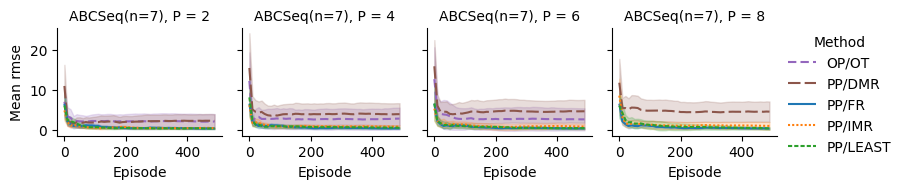

one-step-td


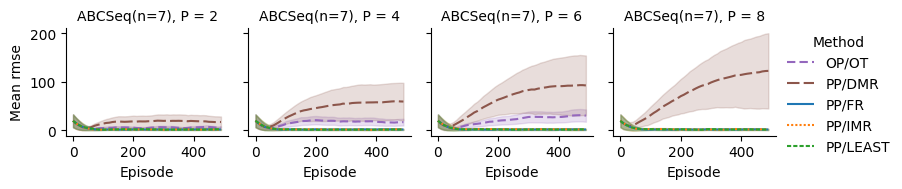

In [24]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


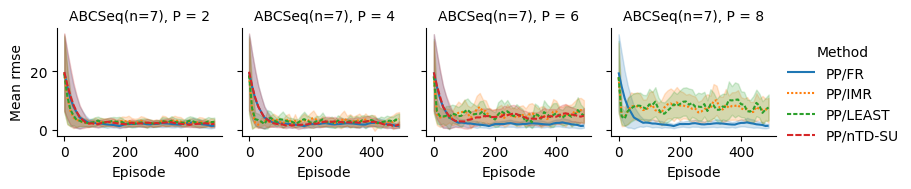

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=1.0$

first-visit-mc


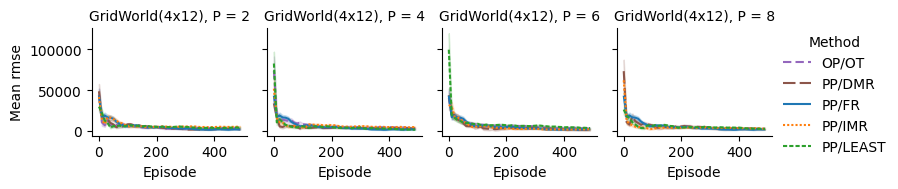

one-step-td


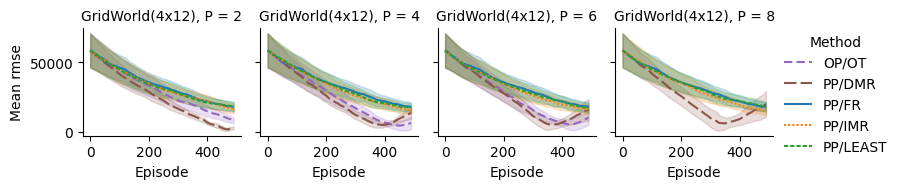

In [26]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


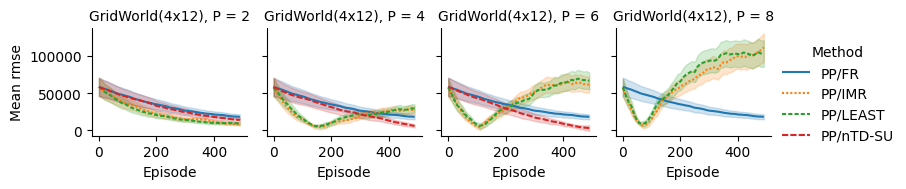

In [27]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=0.99$

first-visit-mc


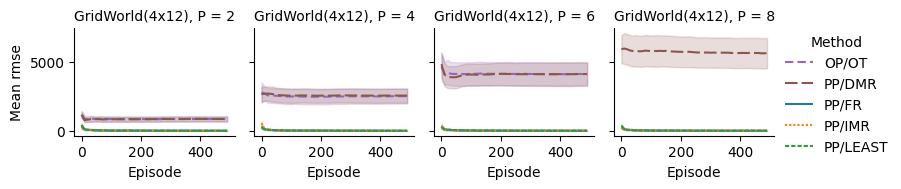

one-step-td


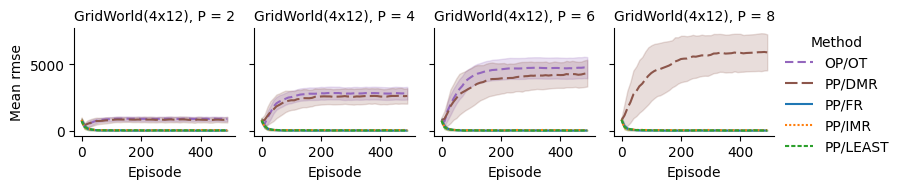

In [28]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


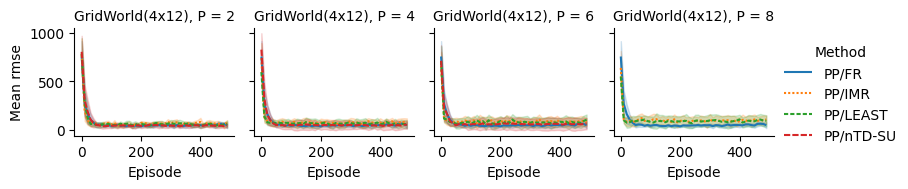

In [29]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=1.0$

first-visit-mc


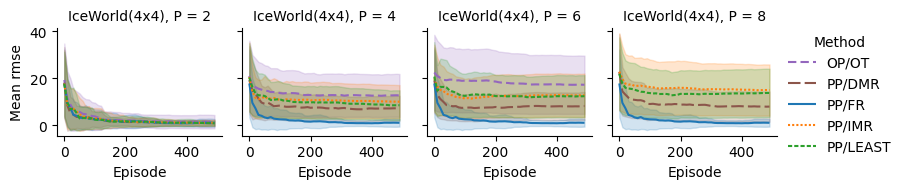

one-step-td


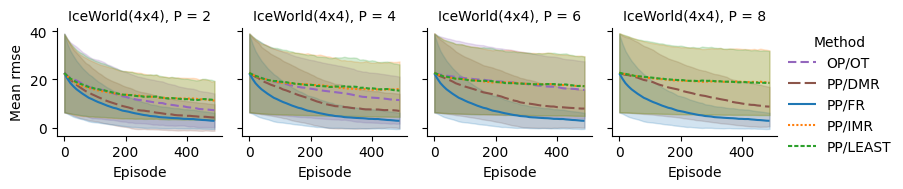

In [30]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


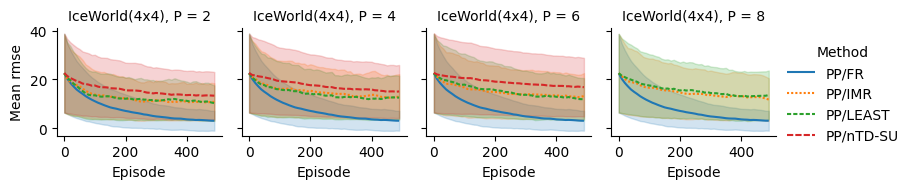

In [31]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=0.99$

first-visit-mc


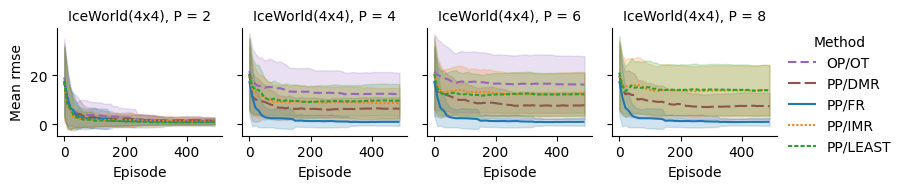

one-step-td


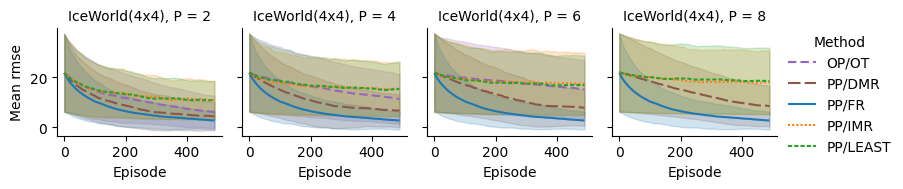

In [32]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


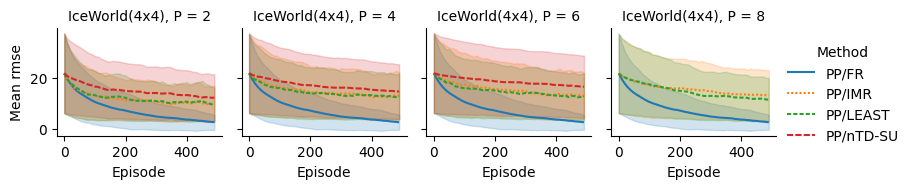

In [33]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=1.0$

first-visit-mc


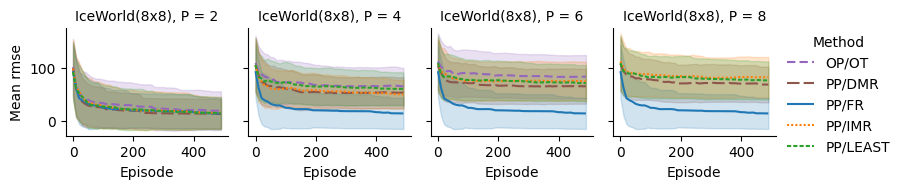

one-step-td


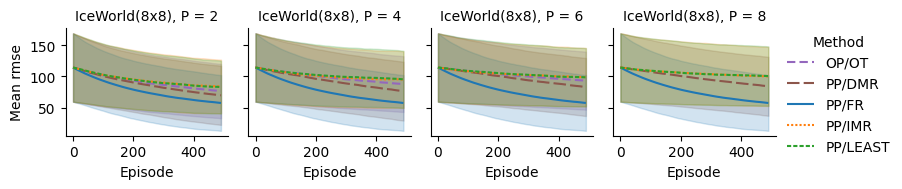

In [34]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


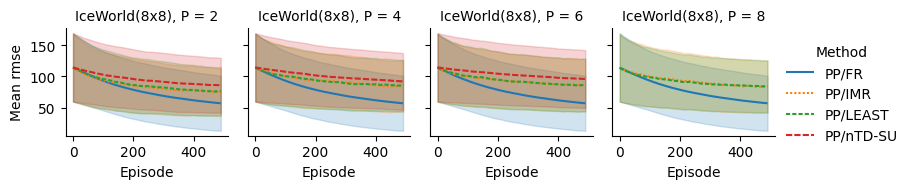

In [35]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=0.99$

first-visit-mc


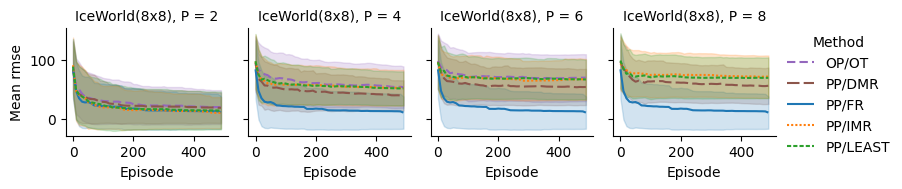

one-step-td


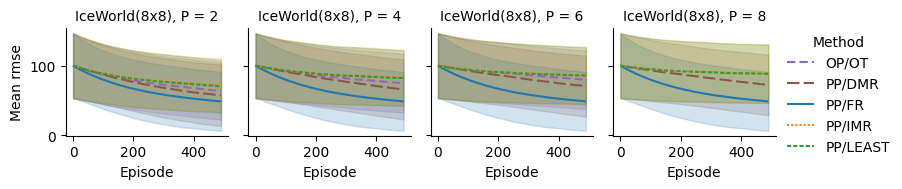

In [36]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


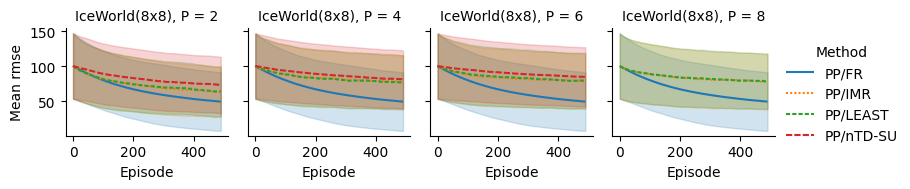

In [37]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=1.0$

first-visit-mc


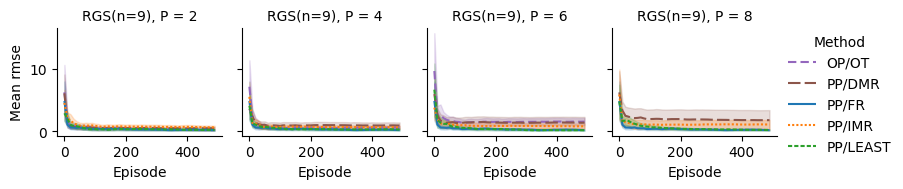

one-step-td


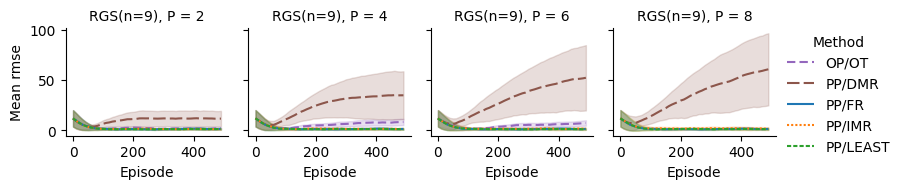

In [38]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


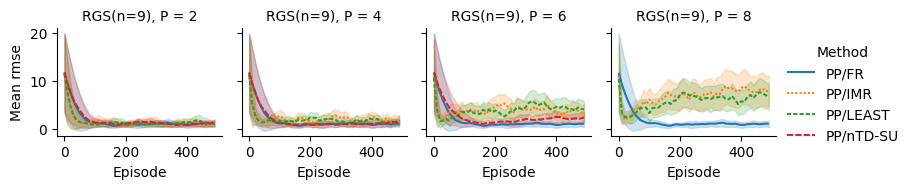

In [39]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=0.99$

first-visit-mc


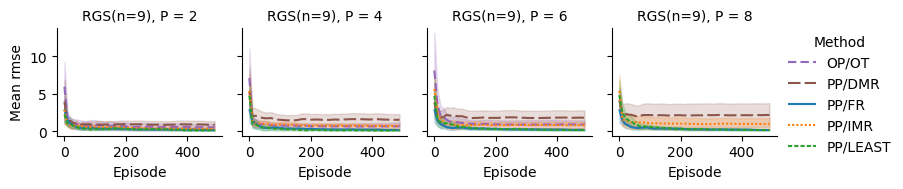

one-step-td


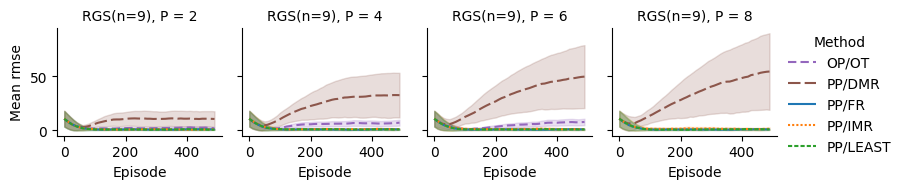

In [40]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


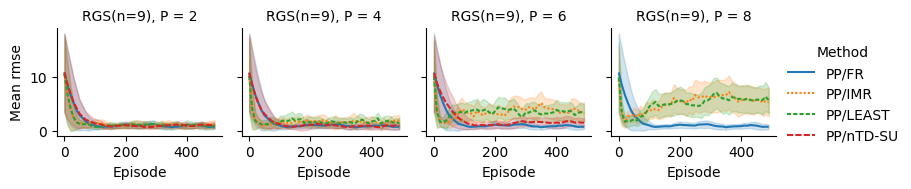

In [41]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=1.0$

first-visit-mc


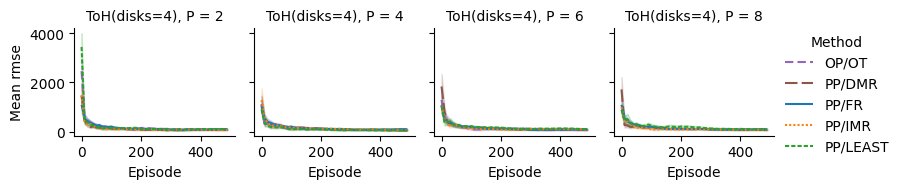

one-step-td


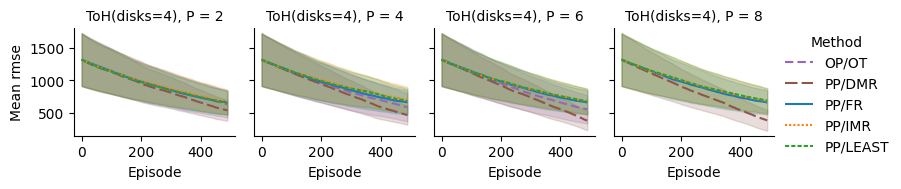

In [42]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


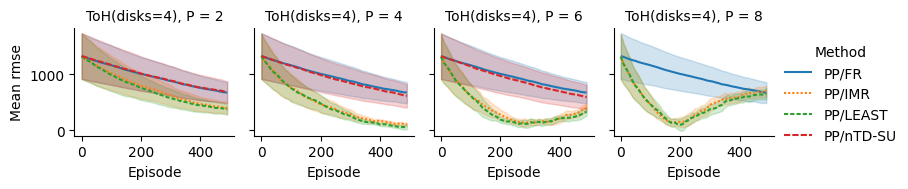

In [43]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=0.99$

first-visit-mc


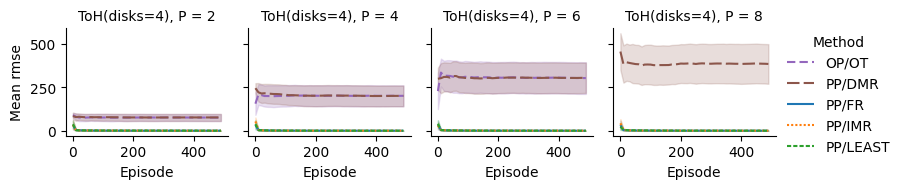

one-step-td


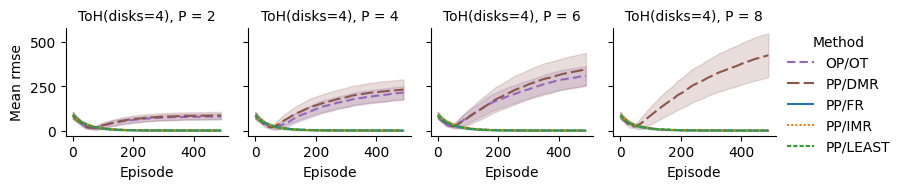

In [44]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


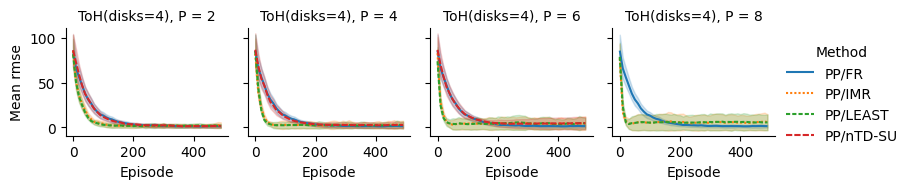

In [45]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=1.0$

first-visit-mc


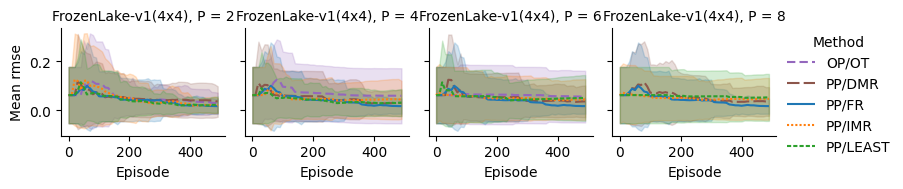

one-step-td


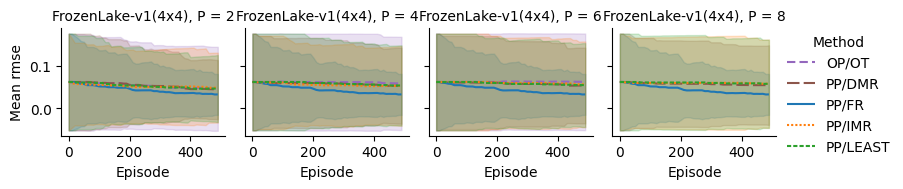

In [46]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


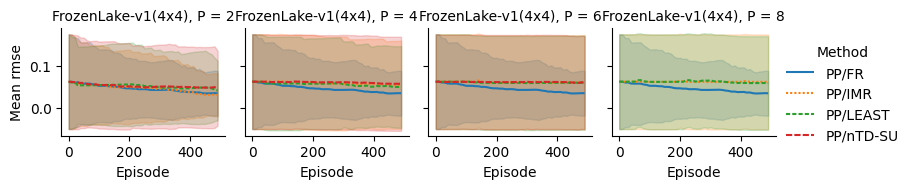

In [47]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=0.99$

first-visit-mc


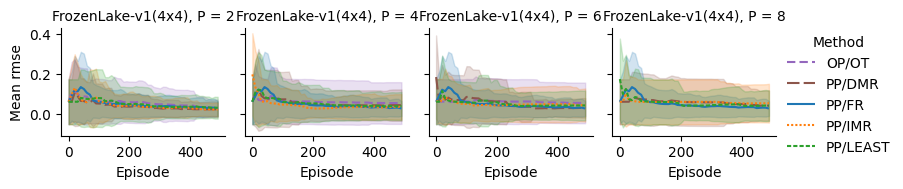

one-step-td


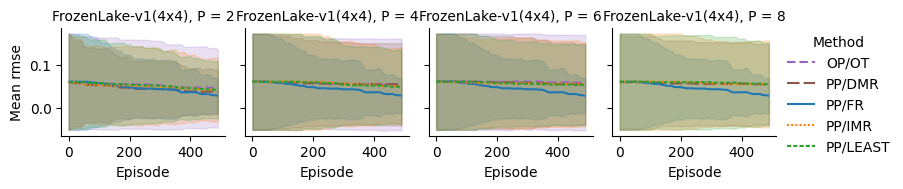

In [48]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


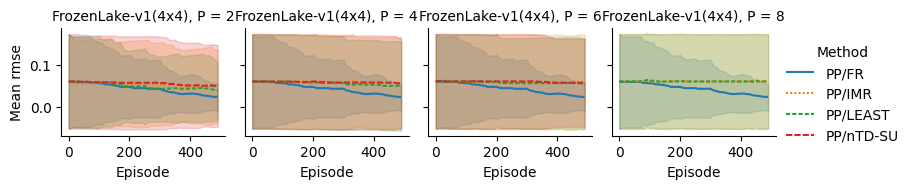

In [49]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)